In [10]:
import networkx as nx
print(nx.__version__)
import matplotlib.pyplot as plt


import json
with open("GasLib-40-split/network.json", "r") as read_file:
    network_data = json.load(read_file)

slack_nodes = []


G = nx.Graph()
G.clear()
for pipe_id in network_data['pipes']:
    G.add_edge(network_data['pipes'][pipe_id]['fr_node'], network_data['pipes'][pipe_id]['to_node'])
for comp_id in network_data['compressors']:
    G.add_edge(network_data['compressors'][comp_id]['fr_node'], network_data['compressors'][comp_id]['to_node'])

print(G.number_of_nodes(), G.number_of_edges())

for node_id in network_data['nodes']:
    if network_data['nodes'][node_id]['slack_bool'] == 1:
        slack_nodes.append(int(node_id))
    G.nodes[int(node_id)]["pos"] = (network_data['nodes'][node_id]['x_coord'], network_data['nodes'][node_id]['y_coord'])
print("The slack node(s) is/are ", [int(s) for s in slack_nodes])

slack_id = slack_nodes[0] #38, if multiple slacks, pick one of them 


interface_node_list = [26, 14]

3.1
40 45
The slack node(s) is/are  [38]


(47.8567226888, 7.29728251758) (47.7185810751, 6.68272868748) (47.7026244783, 7.1514568006) (46.9361991326, 7.44437553119) (46.9192512725, 6.55671455828) (49.7619017195, 8.97279305602)
[-0.11168792 -0.10686341] [-0.1633562  -0.20731224] [-0.21746195 -0.10900386] [-1.          0.05027257] [-0.8139514  -0.36722468] [0.69120358 0.78578817]


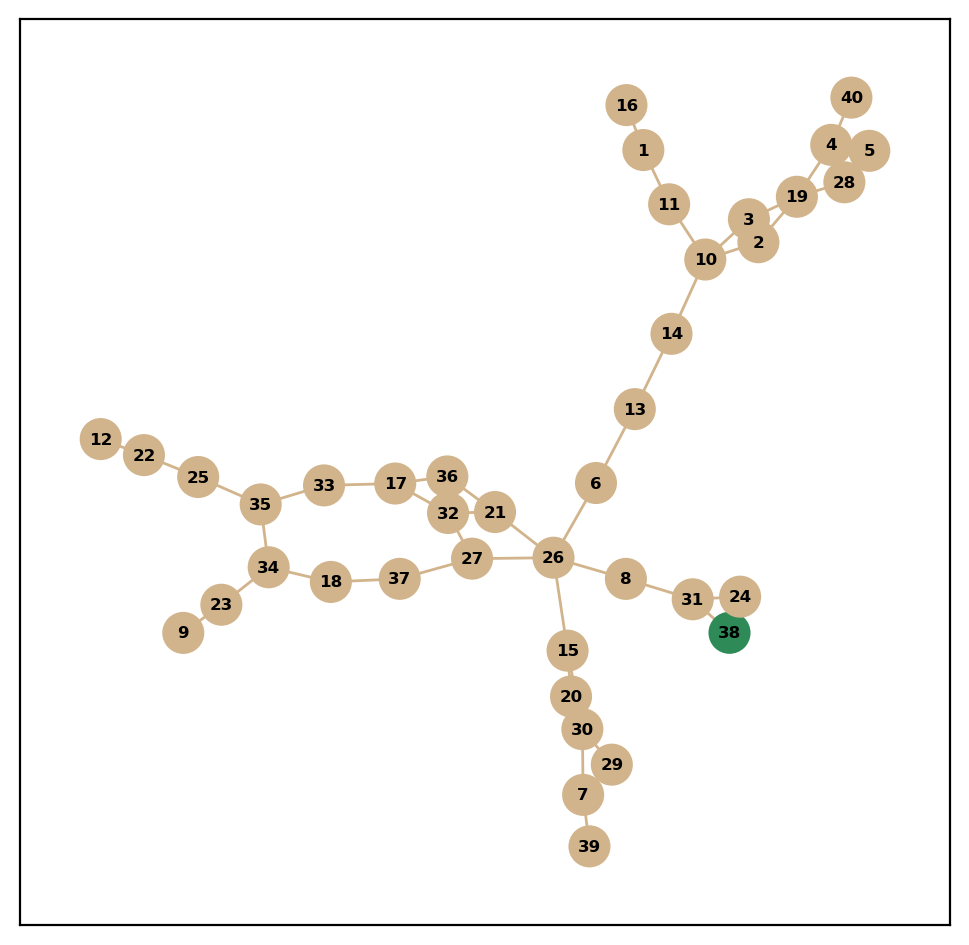

In [16]:
pos = nx.get_node_attributes(G, "pos")
print(pos[21], pos[27], pos[32], pos[12], pos[9], pos[40])

# plt.figure(figsize=(12, 12))
plt.figure(figsize=(6, 6), dpi=200)
pos = nx.spring_layout(G, pos=pos, k=0.25, seed=10)
print(pos[21], pos[27], pos[32], pos[12], pos[9], pos[40])


color_list = ['seagreen' if node_name == slack_id else 'tan' for node_name in list(G.nodes)]
# nx.draw_networkx_nodes(G,  node_size= 600, font_size=16, font_weight='bold', node_color=color_list)
# nx.draw_networkx_edges(G, with_labels=True, node_size= 600, font_size=16, font_weight='bold', node_color=color_list)
nx.draw_networkx(G, pos=pos, with_labels=True, node_size= 200, font_size=6, font_weight='bold', node_color=color_list, edge_color="tan")
plt.show()